In [1]:
import pandas as pd

Build or load a 'CatchmentData' instance to allow access to all needed data

In [2]:
rebuild_catchment = False

In [3]:
from forecasting.catchment_data import CatchmentData
import pickle

if rebuild_catchment:
    catchment = CatchmentData("illinois-kerby", "14377100")

    pickle_out = open("data/catchment.pickle", "wb")
    pickle.dump(catchment, pickle_out)
    pickle_out.close()
else:
    pickle_in = open("data/catchment.pickle", "rb")
    catchment = pickle.load(pickle_in)

Perform a gridsearch to identify the best parameters

In [4]:
perform_gridsearch = False

In [5]:
if perform_gridsearch:
    from forecasting.dataset import Dataset
    ds = Dataset(catchment)

    from darts.models import BlockRNNModel
    from forecasting.dataset import Dataset
    dataset = Dataset(catchment)

    block_rnn_gridsearch_params = {
        "input_chunk_length" : [120],
        "output_chunk_length" : [96],
        "hidden_size" : [25, 50],
        "n_rnn_layers" : [3, 5, 7],
        "dropout" : [0.0],
        "model" : ["LSTM"]
    }

    X_train = dataset.X_validations[0]
    y_train = dataset.y_validation

    y_train, y_val = y_train.split_before(0.7)

    model, block_rnn_best_params = BlockRNNModel.gridsearch(block_rnn_gridsearch_params, verbose=True, series=y_train, past_covariates=X_train, val_series=y_val)
else:
    # Manually entered best parameters from prior gridsearch
    best_params = {
        "input_chunk_length" : 120,
        "output_chunk_length" : 96
    }



In [6]:
overwrite_existing_models = False

In [7]:
from forecasting.forecaster import Forecaster

from darts.models import NBEATSModel
block_rnn_forecaster = Forecaster(catchment, 
                                model_type=NBEATSModel, 
                                model_params=block_rnn_best_params, 
                                model_save_dir="NBEATS3",
                                overwrite_existing_models=overwrite_existing_models)

Importing plotly failed. Interactive plots will not work.


2022-02-28 18:02:21,554 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading existing models.
2022-02-28 18:02:21,555 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 0


[2022-02-28 18:02:21,555] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:21,555] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:21,742 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 1


[2022-02-28 18:02:21,743] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:21,743] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:21,851 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 2


[2022-02-28 18:02:21,851] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:21,851] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:21,958 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 3


[2022-02-28 18:02:21,959] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:21,959] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:22,068 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 4


[2022-02-28 18:02:22,069] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:22,069] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:22,179 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 5


[2022-02-28 18:02:22,180] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:22,180] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:22,285 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 6


[2022-02-28 18:02:22,286] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:22,286] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:22,397 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 7


[2022-02-28 18:02:22,398] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:22,398] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:22,505 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 8


[2022-02-28 18:02:22,505] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:22,505] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:22,613 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 9


[2022-02-28 18:02:22,614] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:22,614] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:22,720 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 10


[2022-02-28 18:02:22,720] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:22,720] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:22,830 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Loading model for dataset 11


[2022-02-28 18:02:22,831] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar
[2022-02-28 18:02:22,831] INFO | darts.models.forecasting.torch_forecasting_model | loading model_best_0.pth.tar


2022-02-28 18:02:22,942 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - All models loaded!


Fetch historical forecasts using the trained model. This will generate a forecast for 48 hours into the future every 6 hours for the entire validation set.

In [8]:
hst_fcasts = block_rnn_forecaster.historical_forecasts(forecast_horizon=48, stride=120, num_samples=100)

2022-02-28 18:02:43,341 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecasts
2022-02-28 18:02:43,342 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 0


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:02:55,687 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:02:55,899 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 1


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:03:05,750 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:03:05,906 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 2


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:03:15,823 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:03:15,977 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 3


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:03:25,888 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:03:26,043 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 4


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:03:35,636 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:03:35,789 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 5


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:03:45,333 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:03:45,488 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 6


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:03:55,359 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:03:55,511 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 7


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:04:05,252 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:04:05,404 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 8


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:04:15,339 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:04:15,496 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 9


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:04:25,770 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:04:25,937 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 10


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:04:35,769 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic
2022-02-28 18:04:35,924 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Generating historical forecast for model 11


  0%|          | 0/243 [00:00<?, ?it/s]

2022-02-28 18:04:45,390 - INFO - c:\Users\orion\Documents\GitHub\river-level-forecasting\forecasting\forecaster.py - Current forecast identified as stochastic


In [9]:
y_pred = hst_fcasts

In [10]:
y_pred

,min,mean,max
time,,,
2018-10-25 22:00:00,-81.519525,53.696144,196.657982
2018-10-30 22:00:00,-50.019777,187.113746,549.066968
2018-11-04 22:00:00,-43.541432,106.753799,239.759413
2018-11-09 22:00:00,-51.707367,62.786554,225.935039
2018-11-14 22:00:00,-105.578488,42.154553,189.603871
...,...,...,...
2022-01-27 22:00:00,695.861318,1020.041233,1343.524109
2022-02-01 22:00:00,805.552768,986.395998,1423.878570
2022-02-06 22:00:00,457.476464,629.495295,930.670721


In [10]:
y_true = block_rnn_forecaster.dataset.y_test
target_scaler = block_rnn_forecaster.dataset.target_scaler
y_true = target_scaler.inverse_transform(y_true)
y_true = y_true.pd_dataframe()

In [40]:
pd.concat([y_true, y_pred], join='inner', axis=1)

,level,min,mean,max
2012-10-26 22:00:00,344.0,210.356183,823.676243,901.136880
2012-10-28 22:00:00,435.0,-2.989766,532.808141,563.999813
2012-10-30 22:00:00,318.0,106.647098,716.367703,776.997337
2012-11-01 22:00:00,1150.0,150.182512,860.362042,949.543511
2012-11-03 22:00:00,486.0,515.792781,1077.046724,1155.134890
...,...,...,...,...
2015-06-15 22:00:00,84.5,2.786877,138.348034,138.877293
2015-06-17 22:00:00,73.9,8.475692,130.375416,130.907102
2015-06-19 22:00:00,68.9,-5.652356,114.205617,114.683729
2015-06-21 22:00:00,67.0,-9.494799,100.991438,101.482013


In [21]:
start = pd.to_datetime("2013-02-02T21:00:00.000000000")
end = pd.to_datetime("2013-04-01T21:00:00.000000000")
y_pred.loc[start:end, :]['max'].max()

2283.3659914862224

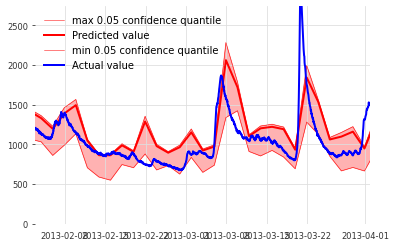

In [33]:
import matplotlib.pyplot as plt
import pandas as pd


fig = plt.figure()
plt.plot(y_pred['max'], color='red', linewidth=0.5, label='max 0.05 confidence quantile')
plt.plot(y_pred['mean'], color='red', linewidth=2, label='Predicted value')
plt.plot(y_pred['min'], color='red', linewidth=0.5, label='min 0.05 confidence quantile')

plt.fill_between(y_pred.index, y1=y_pred['min'], y2=y_pred['max'], color='red', alpha=0.3)

plt.plot(y_true.index, y_true['level'],  color='blue', linewidth=2, label='Actual value')
plt.legend()

y_lim = y_pred.loc[start:end, :]['max'].max() * 1.2
plt.xlim(start,end)
plt.ylim(0, y_lim)
plt.show()

In [ ]:
min = pd.concat(frames).groupby(level=0).min()

mean = pd.concat(frames).groupby(level=0).mean()

max = pd.concat(frames).groupby(level=0).min()

fig = plt.figure()
plt.plot(min.index, min['0'],  color='red')
plt.plot(mean.index, mean['0'],  color='red')
plt.plot(max.index, max['0'],  color='red')
plt.plot(y_true.index, y_true['level'],  color='blue')

plt.autoscale(enable=True, tight=None)
plt.xlim(start,end)
plt.show()

In [ ]:
hst_fcasts = block_rnn_forecaster.historical_forecasts(num_samples=100, forecast_horizon=24, stride=12)

In [ ]:
import pandas as pd
start = pd.to_datetime("2015-09-22T21:00:00.000000000")
end = pd.to_datetime("2015-11-28T21:00:00.000000000")
slice = hst_fcasts[0].slice(start,end)
slice.plot()

In [ ]:
df = block_rnn_forecaster.dataset.y_validation.pd_dataframe()
target_scaler = block_rnn_forecaster.dataset.target_scaler
y_val = target_scaler.inverse_transform(block_rnn_forecaster.dataset.y_validation)
y_val = y_val.pd_dataframe()

In [ ]:
y_pred =  hst_fcasts[0].quantile_df()

In [ ]:
y_pred

In [ ]:
frames= [hst_fcasts[0], y_val]
import pandas as pd
df_joined = pd.concat(frames, axis=1, join="inner")

In [ ]:
df_joined[-550:-500].plot()

In [ ]:

y_true['day'] = y_true.index.dayofyear

In [ ]:
y_true

In [ ]:
df = block_rnn_forecaster.dataset.X_trains[0].pd_dataframe()

In [ ]:
df.iloc[22000:22020, :]

In [ ]:
df['rain_10dy'] = df['rain_1h'].rolling(window=2).sum()